First we will start off by filtering our data for relevant information.

<AxesSubplot:>

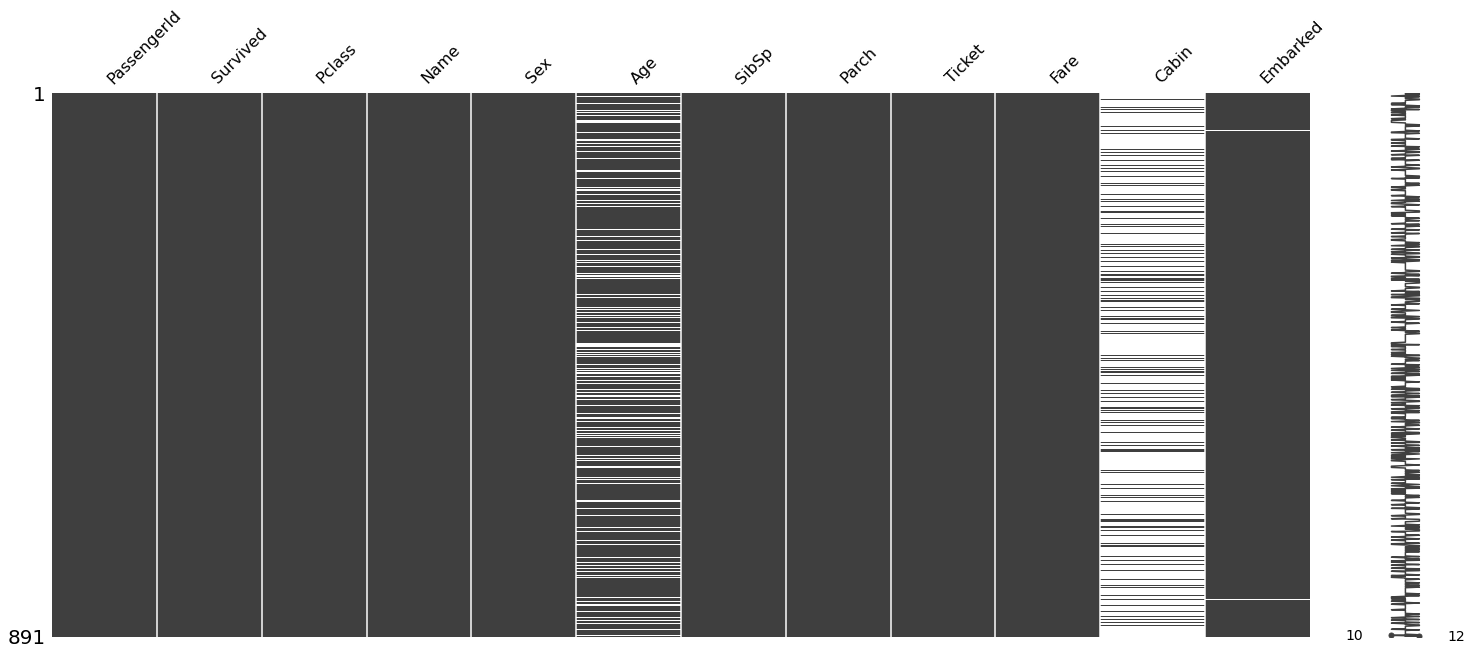

In [2]:
import pandas as pd
import missingno
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv("../titanic/train.csv")
test_data = pd.read_csv("../titanic/test.csv")

missingno.matrix(train_data)

<AxesSubplot:>

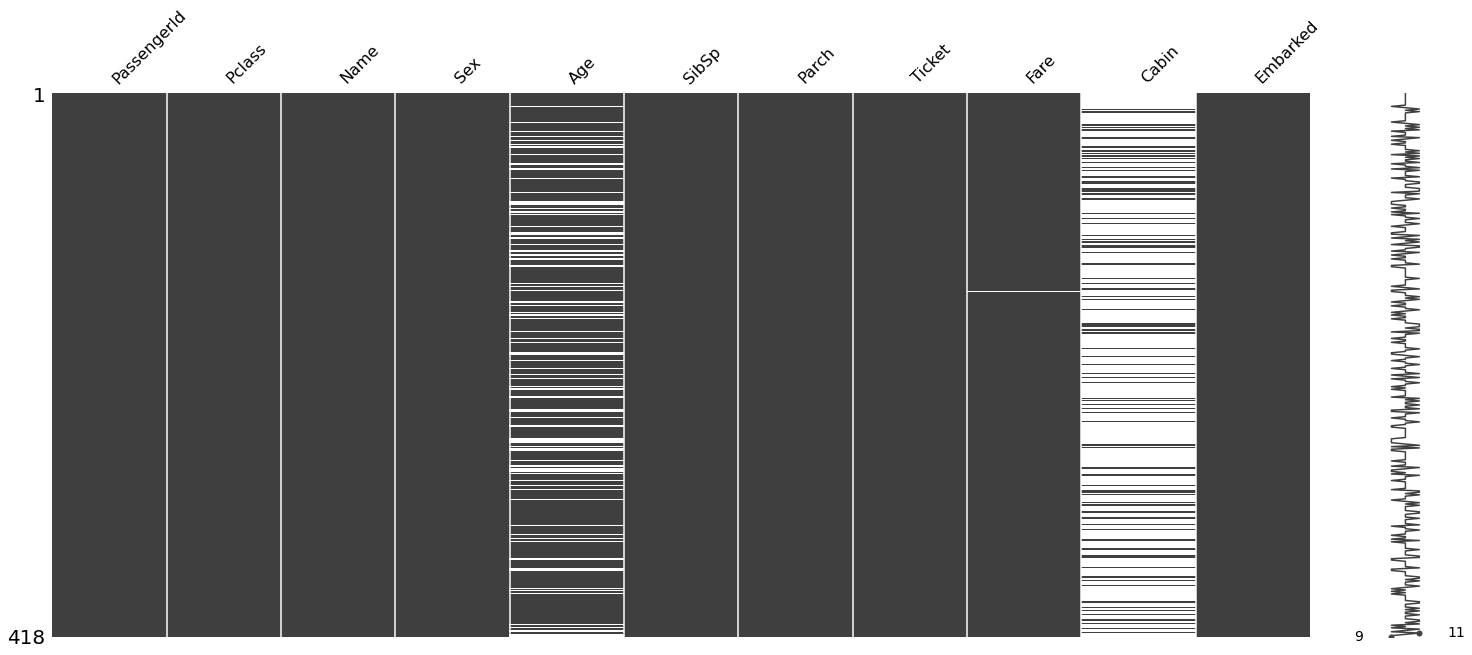

In [3]:
missingno.matrix(test_data)

Cleaning up the data now

In [4]:
def clean_data(data):
    data = data.drop(['Cabin', 'Name', 'Ticket', 'PassengerId'], axis = 1)

    #fill cols of train_data with mean
    cols = ['Age', 'Fare']
    for col in cols:
        data[col].fillna(data[col].median(), inplace=True)
    data.Embarked.fillna("U",inplace=True)
    return data

train_data = clean_data(train_data)
test_data = clean_data(test_data)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [7]:
#convert string cols into integers
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

cols = ['Sex', 'Embarked']

for col in cols:
    train_data[col] = labelencoder.fit_transform(train_data[col])
    test_data[col] = labelencoder.transform(test_data[col])
    print(labelencoder.classes_)


['female' 'male']
['C' 'Q' 'S' 'U']


Building Models:

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = train_data['Survived']
X = train_data.drop('Survived', axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

1. Naive Bayes

In [9]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB().fit(X_train, y_train)
predictions_gnb = gnb.predict(X_val)

accuracy_score(y_val, predictions_gnb)


0.776536312849162

2. LogisticRegression

In [10]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(random_state = 0, max_iter = 1000).fit(X_train, y_train)
predictions_clf = clf.predict(X_val)

accuracy_score(y_val, predictions_clf)

0.8100558659217877

3. Decision Tree

In [11]:
from sklearn.tree import DecisionTreeClassifier

tr = DecisionTreeClassifier(random_state = 0).fit(X_train, y_train)
predictions_tr = tr.predict(X_val)

accuracy_score(y_val, predictions_tr)

0.7821229050279329

4. Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 0).fit(X_train, y_train)
predictions_forest = forest.predict(X_val)

accuracy_score(y_val, predictions_forest)

0.8044692737430168

5. Support Vector Classifier

In [13]:
from sklearn.svm import SVC

svc = SVC(probability = True).fit(X_train, y_train)
predictions_svc = svc.predict(X_val)

accuracy_score(y_val, predictions_svc)

0.659217877094972

6. XG-Boost

In [14]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 0).fit(X_train, y_train)
predictions_xgb = xgb.predict(X_val)

accuracy_score(y_val, predictions_xgb)

[15:55:59] WARNING: /private/var/folders/ww/x0vs25kj1yg8f9wgrrl4_bfw0000gn/T/pip-install-hyk82vu9/xgboost_d5fa84630f114bfaa1a6cf8fa6123d06/build/temp.macosx-12-arm64-3.9/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/homebrew/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.7932960893854749